# Unsupervised Learning in Machine Learning Algorithms

1. K-Means

  📌 The aim is to categorize the observations according to their similarity to each other.

2. Hierarchical Clustering

  📌 The aim is to divide the observations into subsets according to their similarity to each other.

3. Principal Component Analysis(PCA)

  📌 The aim is to represent the main features of multivariate data with fewer variables. In other words, it is to reduce the variable size by risking a small amount of information loss.
  

## Import Necessary Libraries

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2000,236,58,21.2000
1,Alaska,10.0000,263,48,44.5000
2,Arizona,8.1000,294,80,31.0000
3,Arkansas,8.8000,190,50,19.5000
4,California,9.0000,276,91,40.6000


In [ ]:
# index fix
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2000,236,58,21.2000
Alaska,10.0000,263,48,44.5000
Arizona,8.1000,294,80,31.0000
Arkansas,8.8000,190,50,19.5000
California,9.0000,276,91,40.6000


## General Information About to the Dataset

In [ ]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

######################### Head #########################
            Murder  Assault  UrbanPop    Rape
Alabama    13.2000      236        58 21.2000
Alaska     10.0000      263        48 44.5000
Arizona     8.1000      294        80 31.0000
Arkansas    8.8000      190        50 19.5000
California  9.0000      276        91 40.6000
######################### Tail #########################
               Murder  Assault  UrbanPop    Rape
Virginia       8.5000      156        63 20.7000
Washington     4.0000      145        73 26.2000
West Virginia  5.7000       81        39  9.3000
Wisconsin      2.6000       53        66 10.8000
Wyoming        6.8000      161        60 15.6000
######################### Shape #########################
(50, 4)
######################### Types #########################
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object
######################### NA #########################
Murder      0
Assault     0
UrbanPop    0
R

## Analysis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 50
Variables: 4
Cat_cols: 0
Num_cols: 4
Cat_but_car: 0


In [ ]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [ ]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   50.0000
mean     7.7880
std      4.3555
min      0.8000
1%       1.4370
5%       2.1450
10%      2.5600
20%      3.3800
30%      4.7500
40%      6.0000
50%      7.2500
60%      8.6200
70%     10.1200
80%     12.1200
90%     13.3200
95%     15.4000
99%     16.7630
max     17.4000
Name: Murder, dtype: float64


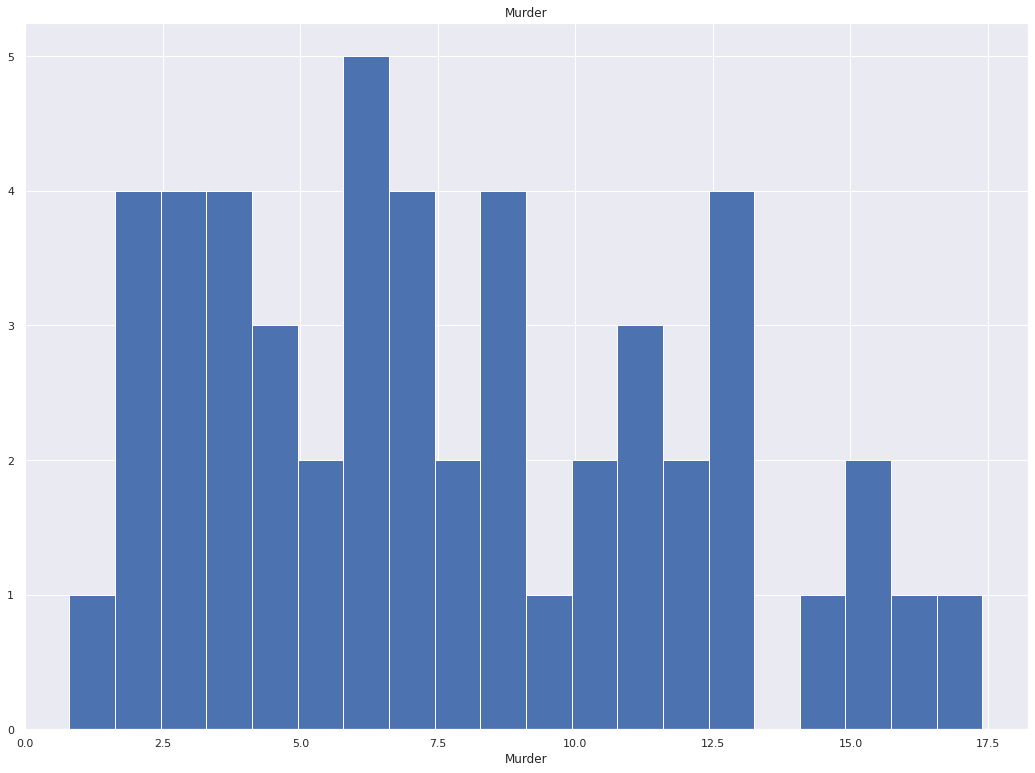

count    50.0000
mean    170.7600
std      83.3377
min      45.0000
1%       45.4900
5%       50.2500
10%      56.9000
20%      98.8000
30%     112.1000
40%     135.0000
50%     159.0000
60%     188.8000
70%     236.6000
80%     254.2000
90%     279.6000
95%     297.3000
99%     336.0200
max     337.0000
Name: Assault, dtype: float64


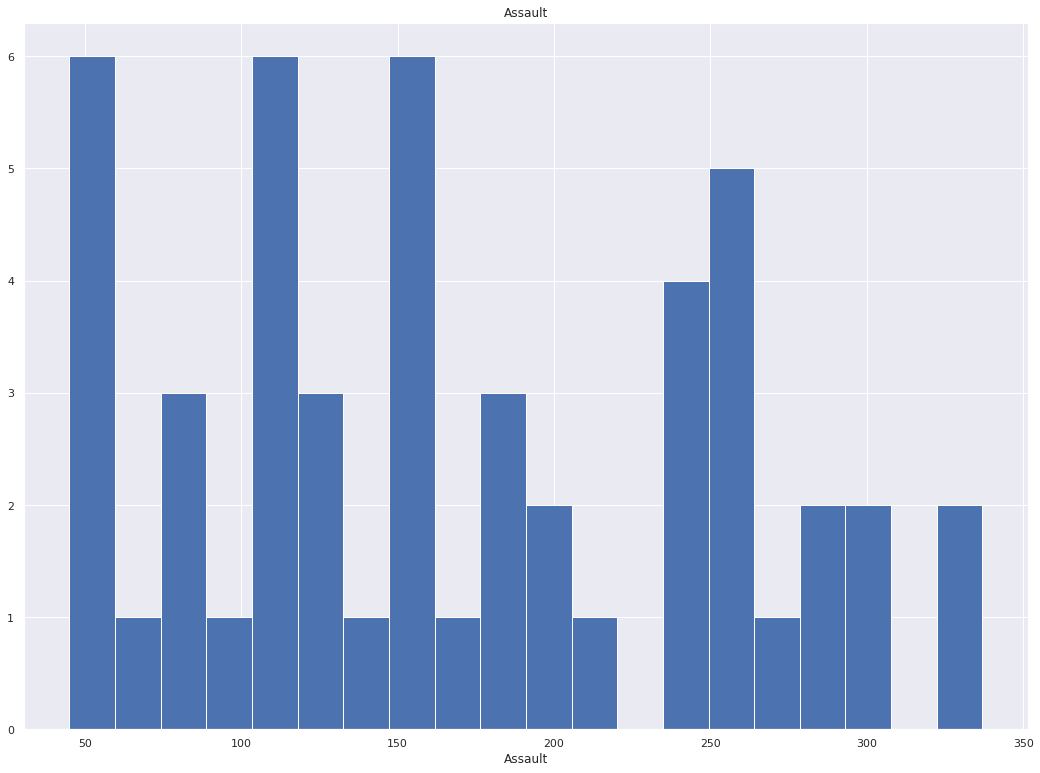

count   50.0000
mean    65.5400
std     14.4748
min     32.0000
1%      35.4300
5%      44.0000
10%     45.0000
20%     51.8000
30%     57.7000
40%     62.6000
50%     66.0000
60%     70.0000
70%     74.3000
80%     80.0000
90%     83.2000
95%     86.5500
99%     90.0200
max     91.0000
Name: UrbanPop, dtype: float64


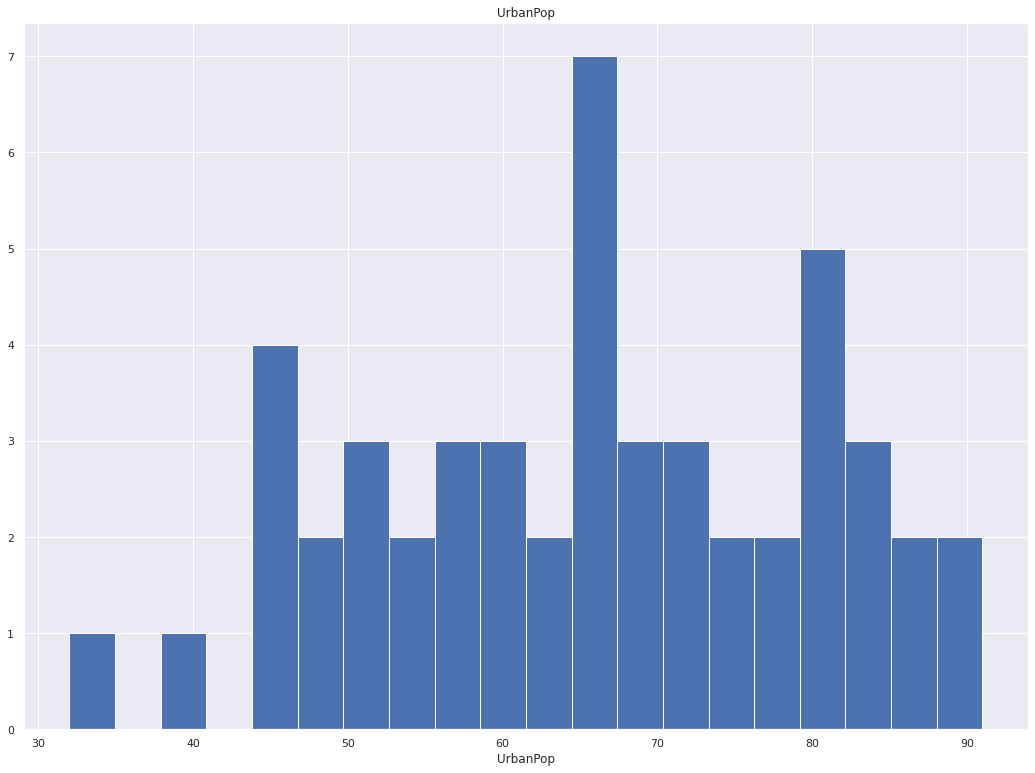

count   50.0000
mean    21.2320
std      9.3664
min      7.3000
1%       7.5450
5%       8.7500
10%     10.6700
20%     13.9200
30%     16.0100
40%     16.8600
50%     20.1000
60%     21.7200
70%     25.5900
80%     27.8800
90%     32.4000
95%     39.7450
99%     45.2650
max     46.0000
Name: Rape, dtype: float64


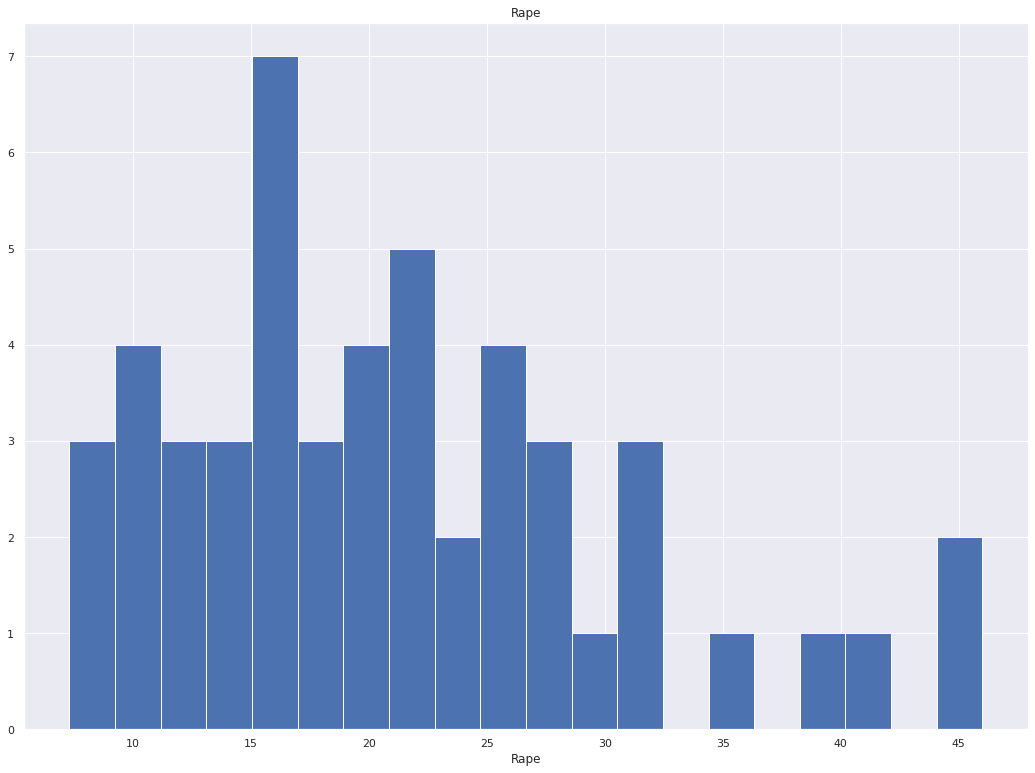

In [ ]:
num_summary_df(df)

## Correlation Analysis

In [ ]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.0000,0.8019,0.0696,0.5636
Assault,0.8019,1.0000,0.2589,0.6652
UrbanPop,0.0696,0.2589,1.0000,0.4113
Rape,0.5636,0.6652,0.4113,1.0000


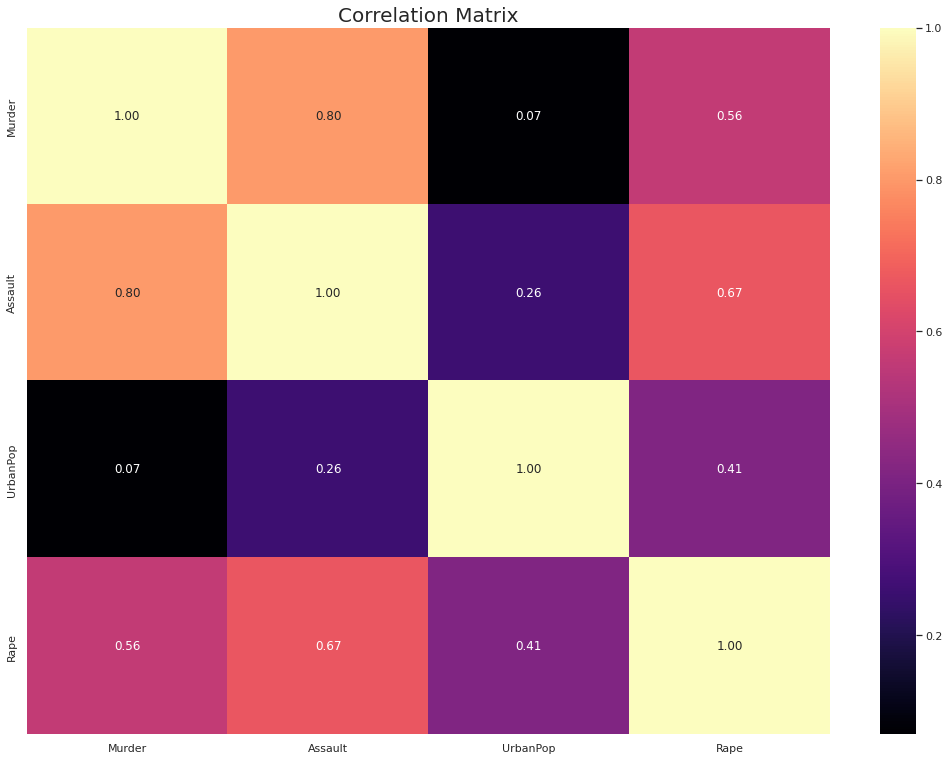

In [ ]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


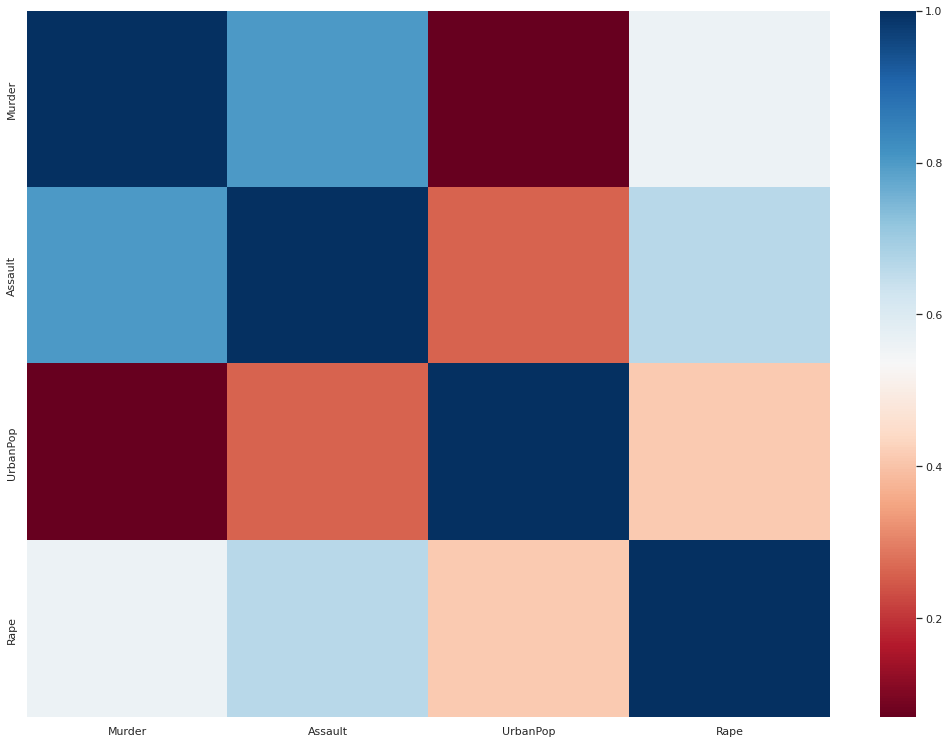

[]

In [ ]:
high_correlated_cols(df, plot=True)

## Missing Value Analysis

In [ ]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

## Outlier Analysis

In [ ]:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [ ]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [ ]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))
  if check_outlier(df, col):
    replace_with_thresholds(df, col)

Murder False
Assault False
UrbanPop False
Rape False


In [ ]:
for col in df.columns:
  print(col, check_outlier(df, col))

Murder False
Assault False
UrbanPop False
Rape False


# K-Means

📌 The aim is to categorize the observations according to their similarity to each other.

In [ ]:
def K_Means_model(dataframe, n_clusters=2, results=True, plot_2D=False, plot_3D=False, save_results=False):
  kmeans_model = KMeans(n_clusters=n_clusters).fit(dataframe)
  if results:
    print("##################### Number of Clusters #####################")
    print("Number of Clusters: ", kmeans_model.n_clusters)
    print("##################### Cluster Centers #####################")
    print(kmeans_model.cluster_centers_)
    print("##################### Cluster Labels #####################")
    print(kmeans_model.labels_ + 1)
  
  if plot_2D:
    plt.figure(figsize=(16,9))
    plt.scatter(dataframe.iloc[:,0], dataframe.iloc[:,1], c=kmeans_model.labels_, s=50, cmap="viridis")
    plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], marker="*", c="black", s=1000, alpha=0.5)
  
  if plot_3D:
    from mpl_toolkits.mplot3d import Axes3D
    kmeans_model = KMeans(n_clusters=3).fit(dataframe)
    plt.rcParams['figure.figsize'] = (16,9)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(dataframe.iloc[:,0], dataframe.iloc[:,1], dataframe.iloc[:,2], c=kmeans_model.labels_, s=50, cmap="viridis")
    ax.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], kmeans_model.cluster_centers_[:,2], marker="*", c="black", s=1000)
  
  if save_results:
    Cluster_df = pd.DataFrame({"Stats": dataframe.index, "Cluster_Number": kmeans_model.labels_ + 1})
    Cluster_df.to_csv("Cluster_df.csv")
    dataframe["Cluster_Number"] = kmeans_model.labels_ + 1
    dataframe.to_csv("new_df.csv")


##################### Number of Clusters #####################
Number of Clusters:  2
##################### Cluster Centers #####################
[[ 11.85714286 255.          67.61904762  28.11428571   2.76190476]
 [  4.84137931 109.75862069  64.03448276  16.24827586   3.44827586]]
##################### Cluster Labels #####################
[1 1 1 1 1 1 2 1 1 1 2 2 1 2 2 2 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 1 2 2 2 2
 2 2 1 2 1 1 2 2 2 2 2 2 2]


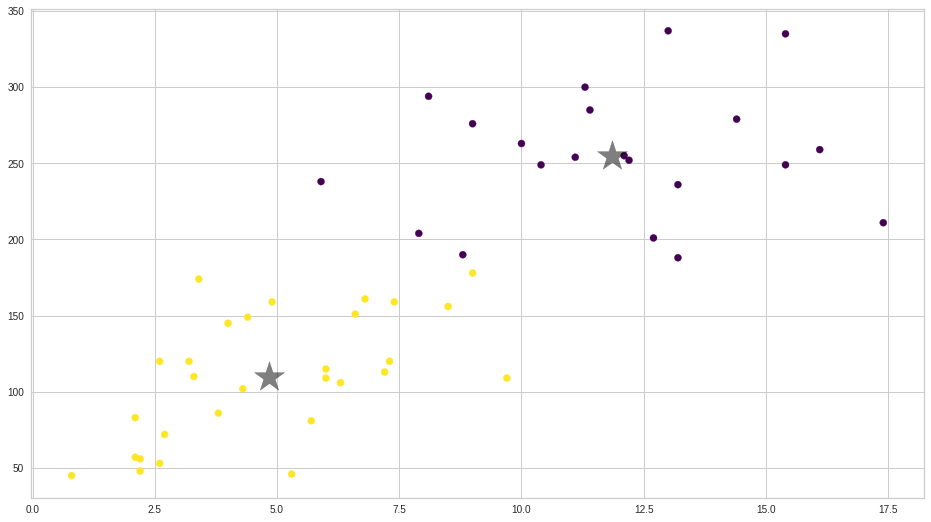

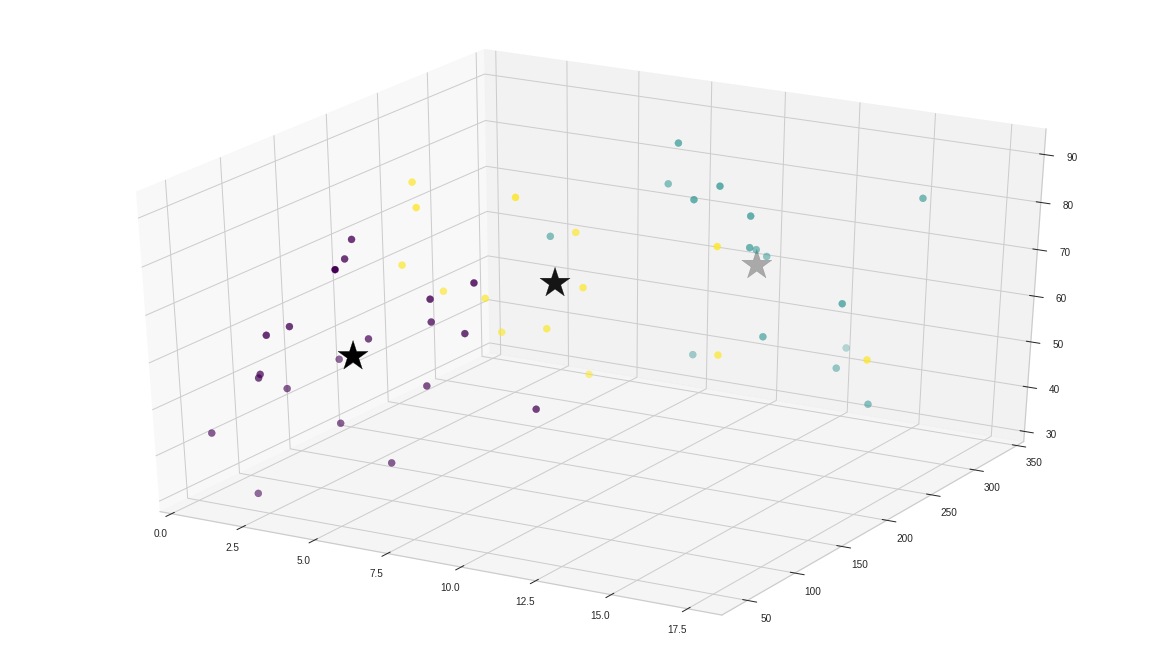

In [ ]:
K_Means_model(df, plot_2D=True, plot_3D=True, save_results=True)

In [ ]:
def K_Means_model_tuning(dataframe, max_cluster=20, results=True, save_results=False):
  kmeans_model = KMeans()
  visualizer = KElbowVisualizer(kmeans_model, k=(2, max_cluster))
  visualizer.fit(dataframe)
  visualizer.poof()
  n_clusters = visualizer.elbow_value_
  print("##################### Find Optimum Clusters #####################")
  print("Optimum Clusters: ", n_clusters)

  kmeans_model_tuned = KMeans(n_clusters=n_clusters).fit(dataframe)
  if results:
    print("##################### Number of Clusters #####################")
    print("Number of Clusters: ", kmeans_model_tuned.n_clusters)
    print("##################### Cluster Centers #####################")
    print(kmeans_model_tuned.cluster_centers_)
    print("##################### Cluster Labels #####################")
    print(kmeans_model_tuned.labels_ + 1)
  
  if save_results:
    Cluster_df = pd.DataFrame({"Stats": dataframe.index, "Cluster_Number": kmeans_model_tuned.labels_ + 1})
    Cluster_df.to_csv("Cluster_df.csv")
    dataframe["Cluster_Number"] = kmeans_model_tuned.labels_ + 1
    dataframe.to_csv("new_df.csv")

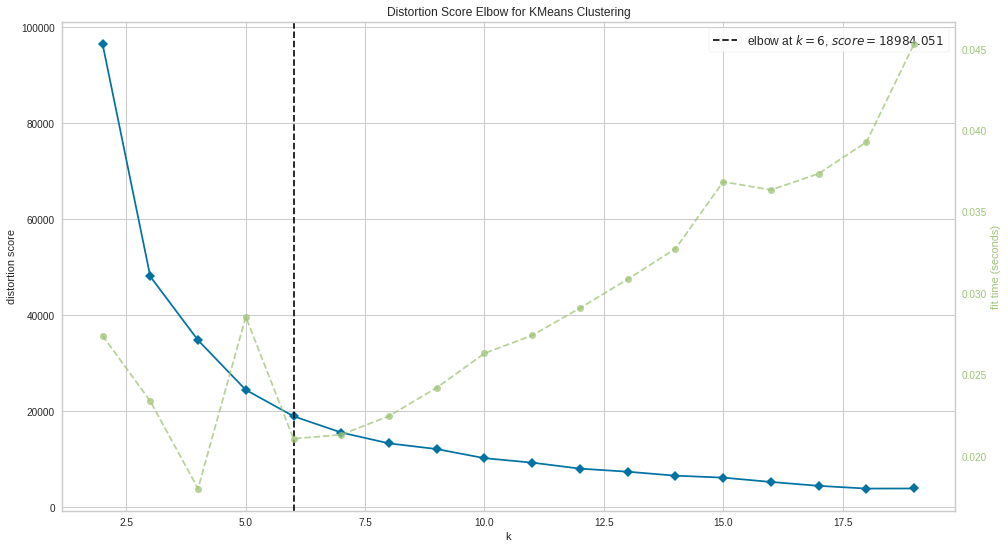

##################### Find Optimum Clusters #####################
Optimum Clusters:  6
##################### Number of Clusters #####################
Number of Clusters:  6
##################### Cluster Centers #####################
[[ 11.95       316.5         68.          26.7          1.        ]
 [  5.75       156.75        74.          19.4          6.        ]
 [  5.59       112.4         65.6         17.27         3.        ]
 [ 11.76666667 257.91666667  68.41666667  28.93333333   4.        ]
 [  2.95        62.7         53.9         11.51         5.        ]
 [ 11.5        195.33333333  66.16666667  27.43333333   2.        ]]
##################### Cluster Labels #####################
[4 4 1 6 4 6 3 4 1 6 5 3 4 3 5 3 3 4 5 1 2 4 5 4 6 3 3 4 5 2 4 4 1 5 3 2 2
 3 2 4 5 6 6 3 5 2 2 5 5 2]


In [ ]:
K_Means_model_tuning(df, save_results=True)

# Hierarchical Clustering

📌 The aim is to divide the observations into subsets according to their similarity to each other.
  

In [ ]:
def Hierarchical_Clustering(dataframe, p=10):
  hc_complete = linkage(dataframe, "complete")
  hc_average = linkage(dataframe, "average")
  hc_single = linkage(dataframe, "single")
  plt.figure(figsize=(16,10))
  plt.title("Hierarchical Clustering - Dendrogram")
  plt.xlabel("Index")
  plt.ylabel("Distance")
  dendrogram(hc_complete, leaf_font_size=10);
  if p:
    plt.figure(figsize=(16,10))
    plt.title("Hierarchical Clustering - Dendrogram")
    plt.xlabel("Index")
    plt.ylabel("Distance")
    dendrogram(hc_complete, truncate_mode="lastp", p=p, show_contracted=True);

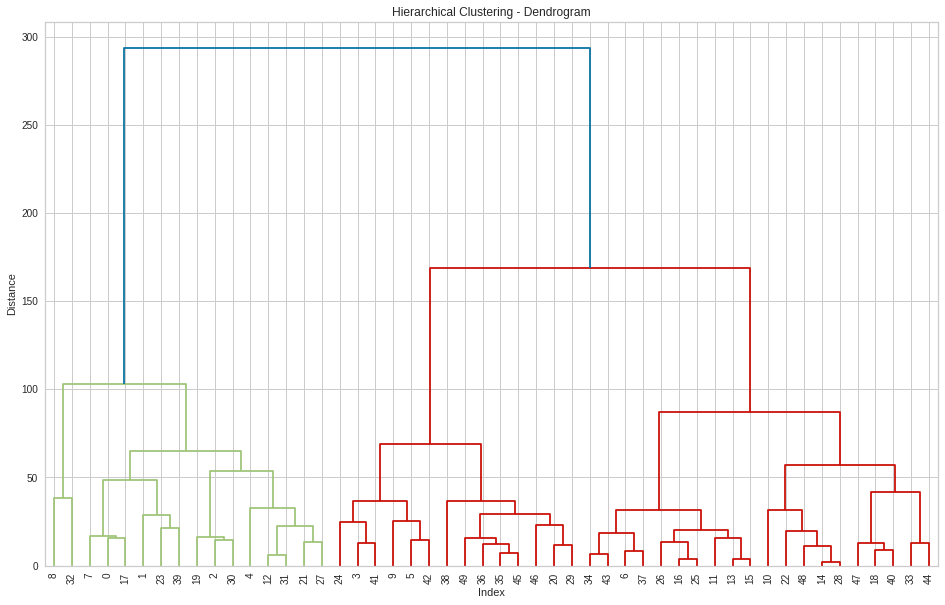

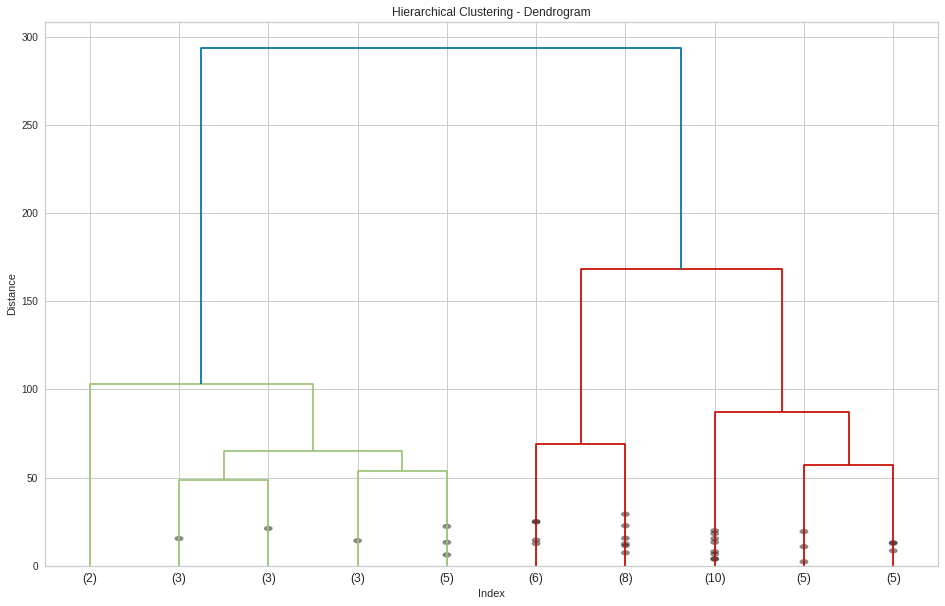

In [ ]:
Hierarchical_Clustering(df, p=10)

In [ ]:
def Agglomerative_Clustering(dataframe, n_clusters, results=True, save_results=True):
  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity="euclidean", linkage="ward")
  cluster_labels = cluster.fit_predict(dataframe)
  if results:
    print("##################### Number of Clusters #####################")
    print("Number of Clusters: ", n_clusters)
    print("##################### Cluster Labels #####################")
    print(cluster_labels + 1)
  
  if save_results:
    Cluster_df = pd.DataFrame({"Stats": dataframe.index, "Cluster_Number": cluster_labels + 1})
    Cluster_df.to_csv("Cluster_df.csv")
    dataframe["Cluster_Number"] = cluster_labels + 1
    dataframe.to_csv("new_df.csv")

In [ ]:
Agglomerative_Clustering(df, n_clusters=4)

##################### Number of Clusters #####################
Number of Clusters:  4
##################### Cluster Labels #####################
[1 1 1 3 1 3 4 1 1 3 2 4 1 4 2 4 4 1 2 1 3 1 2 1 3 4 4 1 2 3 1 1 1 2 4 3 3
 4 3 1 2 3 3 4 2 3 3 2 2 3]


# Principal Component Analysis(PCA)

📌 The aim is to represent the main features of multivariate data with fewer variables. In other words, it is to reduce the variable size by risking a small amount of information loss.

In [ ]:
def PCA_model(dataframe, n_components=2, results=True, save_results=False):
  df = StandardScaler().fit_transform(dataframe)
  pca_model = PCA(n_components=n_components)
  pca_model_fit = pca_model.fit_transform(df)
  if results:
    print("Explained Variance: ", pca_model.explained_variance_ratio_)
    pca = PCA().fit(df)
    plt.figure(figsize=(16,10))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("Explainability Ratio of Variables")

  if save_results:
    pca_df = pd.DataFrame(data=pca_model_fit)
    pca_df.to_csv("pca_df.csv")
    pca_df.head()

Explained Variance:  [0.55875627 0.22527542]


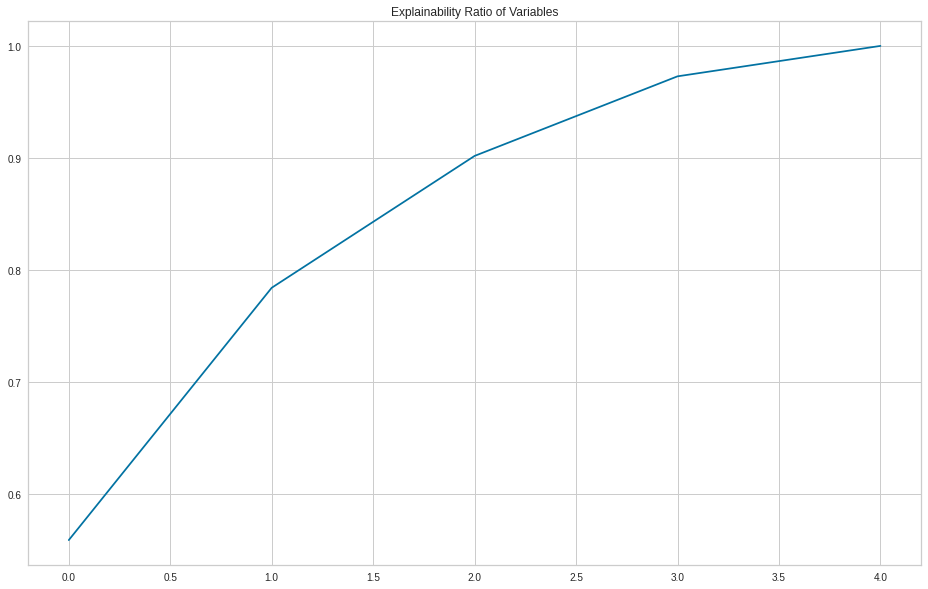

In [ ]:
PCA_model(df, save_results=True)